In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# CIFAR-10 Dataset & DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

criterion = nn.CrossEntropyLoss()

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

def train_model(model, train_loader, test_loader, epochs=20, pth_path=None,optimizer =None):
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        val_loss, val_acc = evaluate_model(model, test_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    torch.save(model.state_dict(), "/content/drive/MyDrive/Intro_to_DL/"+pth_path)
    return train_losses, val_losses, train_accuracies, val_accuracies

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct, total, running_loss = 0, 0, 0.0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = running_loss / len(test_loader)
    accuracy = 100 * correct / total
    return val_loss, accuracy

# Function to Plot Results
def plot_results(train_losses, train_accuracies, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Over Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Train Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Over Epochs")
    plt.legend()

    plt.show()

# Function to Calculate Precision, Recall, F1-score, Confusion Matrix
def classification_metrics(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, digits=4))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


Epoch [1/20] | Train Loss: 1.7930 | Train Acc: 36.02% | Val Loss: 1.5771 | Val Acc: 44.79%
Epoch [2/20] | Train Loss: 1.6366 | Train Acc: 42.11% | Val Loss: 1.5150 | Val Acc: 46.44%
Epoch [3/20] | Train Loss: 1.5718 | Train Acc: 44.97% | Val Loss: 1.4901 | Val Acc: 47.82%
Epoch [4/20] | Train Loss: 1.5205 | Train Acc: 46.51% | Val Loss: 1.4270 | Val Acc: 50.11%
Epoch [5/20] | Train Loss: 1.4819 | Train Acc: 47.90% | Val Loss: 1.4131 | Val Acc: 50.09%
Epoch [6/20] | Train Loss: 1.4557 | Train Acc: 48.90% | Val Loss: 1.4294 | Val Acc: 49.63%
Epoch [7/20] | Train Loss: 1.4220 | Train Acc: 49.95% | Val Loss: 1.3947 | Val Acc: 51.04%
Epoch [8/20] | Train Loss: 1.3924 | Train Acc: 50.87% | Val Loss: 1.3657 | Val Acc: 51.93%
Epoch [9/20] | Train Loss: 1.3692 | Train Acc: 51.69% | Val Loss: 1.3635 | Val Acc: 52.17%
Epoch [10/20] | Train Loss: 1.3474 | Train Acc: 52.67% | Val Loss: 1.3598 | Val Acc: 52.28%
Epoch [11/20] | Train Loss: 1.3303 | Train Acc: 53.26% | Val Loss: 1.3511 | Val Acc: 53.4

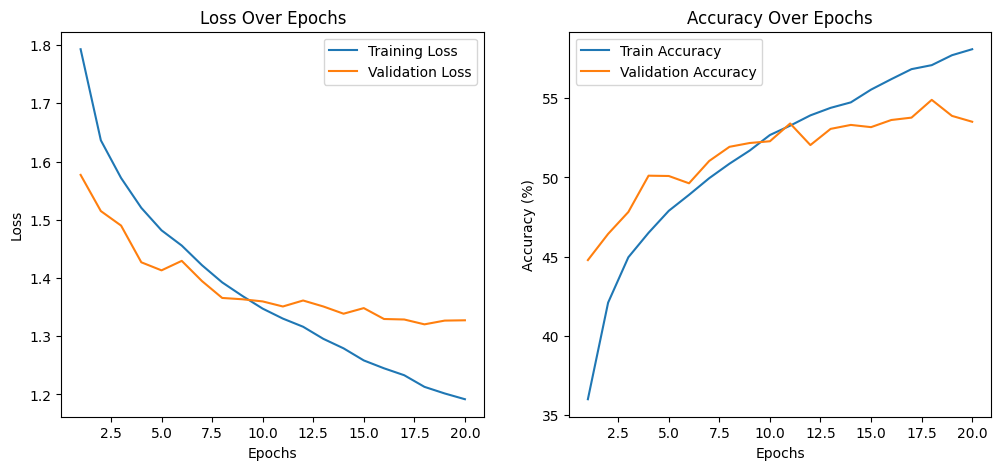


Classification Report:
              precision    recall  f1-score   support

           0     0.5705    0.6150    0.5919      1000
           1     0.7108    0.6120    0.6577      1000
           2     0.4106    0.3420    0.3732      1000
           3     0.3471    0.4630    0.3967      1000
           4     0.4162    0.5290    0.4659      1000
           5     0.4145    0.3830    0.3981      1000
           6     0.6269    0.5880    0.6068      1000
           7     0.7120    0.5340    0.6103      1000
           8     0.6500    0.7040    0.6759      1000
           9     0.6261    0.5810    0.6027      1000

    accuracy                         0.5351     10000
   macro avg     0.5485    0.5351    0.5379     10000
weighted avg     0.5485    0.5351    0.5379     10000



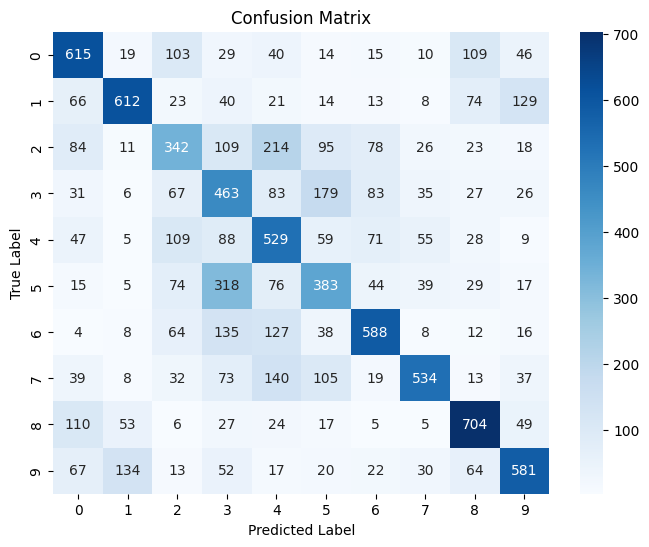

In [ ]:
# Define Multi-Layer Perceptron (MLP)
class MLP(nn.Module):
    def __init__(self, input_size=3072, hidden_sizes=[512, 256, 128], num_classes=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Initialize model, loss, and optimizer
model = MLP().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train and Evaluate the Model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, epochs=20, pth_path="baseline_MLP_CIFAR.pth", optimizer=optimizer)
plot_results(train_losses, train_accuracies, val_losses, val_accuracies)
classification_metrics(model, test_loader)


Epoch [1/20] | Train Loss: 1.9083 | Train Acc: 29.29% | Val Loss: 1.7270 | Val Acc: 37.42%
Epoch [2/20] | Train Loss: 1.7393 | Train Acc: 38.18% | Val Loss: 1.6315 | Val Acc: 42.67%
Epoch [3/20] | Train Loss: 1.6591 | Train Acc: 41.36% | Val Loss: 1.5494 | Val Acc: 45.10%
Epoch [4/20] | Train Loss: 1.6080 | Train Acc: 43.15% | Val Loss: 1.5315 | Val Acc: 45.87%
Epoch [5/20] | Train Loss: 1.5659 | Train Acc: 45.07% | Val Loss: 1.4976 | Val Acc: 47.84%
Epoch [6/20] | Train Loss: 1.5430 | Train Acc: 46.17% | Val Loss: 1.4908 | Val Acc: 47.82%
Epoch [7/20] | Train Loss: 1.5207 | Train Acc: 46.40% | Val Loss: 1.4764 | Val Acc: 48.53%
Epoch [8/20] | Train Loss: 1.5009 | Train Acc: 47.54% | Val Loss: 1.4609 | Val Acc: 49.88%
Epoch [9/20] | Train Loss: 1.4818 | Train Acc: 48.35% | Val Loss: 1.4623 | Val Acc: 49.14%
Epoch [10/20] | Train Loss: 1.4701 | Train Acc: 48.72% | Val Loss: 1.4242 | Val Acc: 50.23%
Epoch [11/20] | Train Loss: 1.4554 | Train Acc: 49.23% | Val Loss: 1.4387 | Val Acc: 50.5

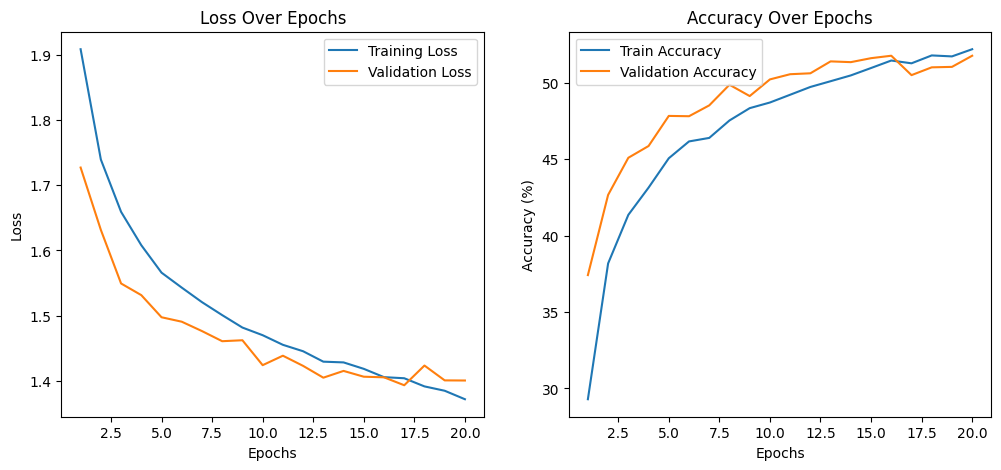


Classification Report:
              precision    recall  f1-score   support

           0     0.5956    0.5700    0.5825      1000
           1     0.6629    0.6490    0.6559      1000
           2     0.4283    0.2420    0.3093      1000
           3     0.2980    0.5590    0.3887      1000
           4     0.4227    0.4650    0.4429      1000
           5     0.4703    0.2770    0.3486      1000
           6     0.6083    0.5250    0.5636      1000
           7     0.6184    0.5930    0.6054      1000
           8     0.6076    0.7170    0.6578      1000
           9     0.6234    0.5810    0.6014      1000

    accuracy                         0.5178     10000
   macro avg     0.5336    0.5178    0.5156     10000
weighted avg     0.5336    0.5178    0.5156     10000



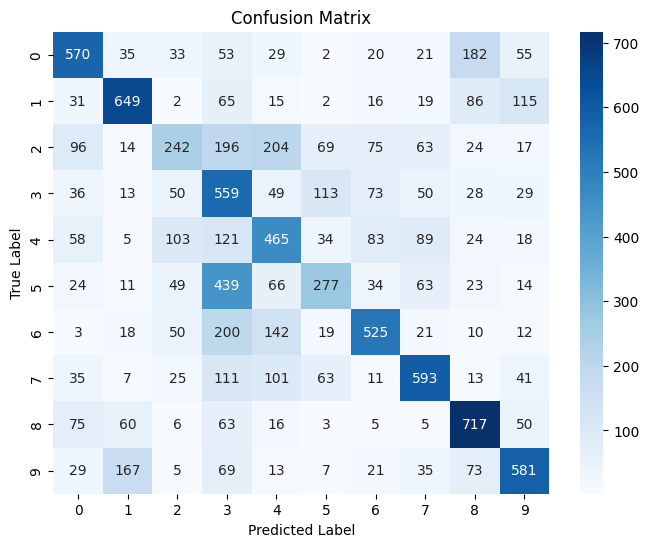

In [ ]:
# Function to Calculate Precision, Recall, F1-score, Confusion Matrix
def classification_metrics(model, test_loader, device):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, digits=4, zero_division=0))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


# Define Deep MLP (Increased Depth)
class DeepMLP(nn.Module):
    def __init__(self, input_size=3072, hidden_sizes=[512, 512, 256, 256, 128, 128], num_classes=10):
        super(DeepMLP, self).__init__()
        self.layers = nn.ModuleList()
        prev_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(prev_size, hidden_size))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(0.3))
            prev_size = hidden_size
        self.layers.append(nn.Linear(prev_size, num_classes))

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        for layer in self.layers:
            x = layer(x)
        return x

# Define Wide MLP (Increased Width)
class WideMLP(nn.Module):
    def __init__(self, input_size=3072, hidden_sizes=[1024, 1024, 512], num_classes=10):
        super(WideMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Initialize models, loss, and optimizer
deep_model = DeepMLP().to(device)
wide_model = WideMLP().to(device)

deep_optimizer = optim.Adam(deep_model.parameters(), lr=0.001)
wide_optimizer = optim.Adam(wide_model.parameters(), lr=0.001)


# Train and Evaluate the Models
deep_train_losses, deep_val_losses, deep_train_accuracies,  deep_val_accuracies = train_model(deep_model, train_loader, test_loader, epochs=20, pth_path="deep_MLP_CIFAR.pth", optimizer=deep_optimizer)
plot_results(deep_train_losses, deep_train_accuracies, deep_val_losses, deep_val_accuracies)
classification_metrics(deep_model, test_loader,device)


Epoch [1/20] | Train Loss: 1.7763 | Train Acc: 36.78% | Val Loss: 1.5976 | Val Acc: 42.84%
Epoch [2/20] | Train Loss: 1.6359 | Train Acc: 42.37% | Val Loss: 1.5156 | Val Acc: 47.05%
Epoch [3/20] | Train Loss: 1.5770 | Train Acc: 44.61% | Val Loss: 1.4993 | Val Acc: 46.90%
Epoch [4/20] | Train Loss: 1.5272 | Train Acc: 46.15% | Val Loss: 1.4631 | Val Acc: 48.61%
Epoch [5/20] | Train Loss: 1.4965 | Train Acc: 47.63% | Val Loss: 1.4318 | Val Acc: 50.17%
Epoch [6/20] | Train Loss: 1.4679 | Train Acc: 48.14% | Val Loss: 1.4305 | Val Acc: 49.82%
Epoch [7/20] | Train Loss: 1.4405 | Train Acc: 49.37% | Val Loss: 1.4439 | Val Acc: 49.25%
Epoch [8/20] | Train Loss: 1.4179 | Train Acc: 50.55% | Val Loss: 1.3935 | Val Acc: 51.20%
Epoch [9/20] | Train Loss: 1.3819 | Train Acc: 51.37% | Val Loss: 1.4152 | Val Acc: 50.19%
Epoch [10/20] | Train Loss: 1.3625 | Train Acc: 52.42% | Val Loss: 1.3795 | Val Acc: 52.17%
Epoch [11/20] | Train Loss: 1.3441 | Train Acc: 52.75% | Val Loss: 1.4011 | Val Acc: 52.0

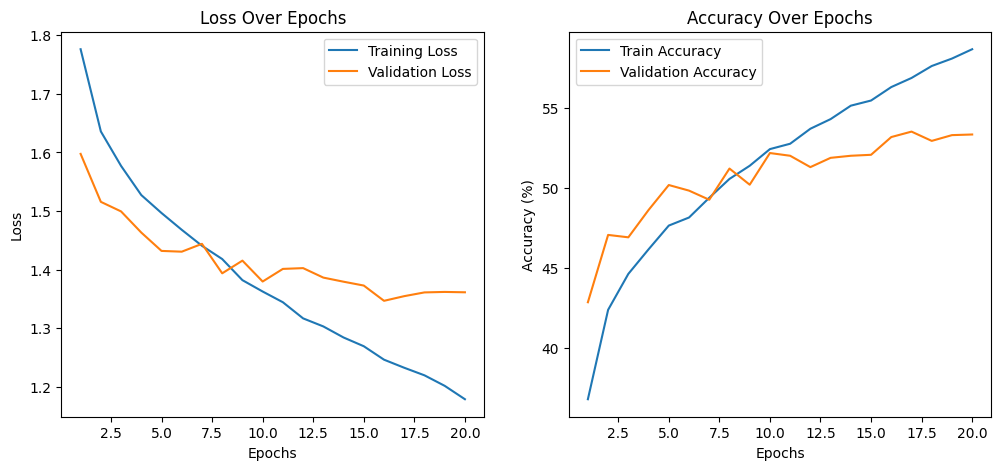


Classification Report:
              precision    recall  f1-score   support

           0     0.5579    0.6550    0.6026      1000
           1     0.6957    0.6240    0.6579      1000
           2     0.5030    0.3390    0.4050      1000
           3     0.3484    0.2160    0.2667      1000
           4     0.3538    0.6210    0.4508      1000
           5     0.4299    0.4940    0.4597      1000
           6     0.5806    0.5620    0.5711      1000
           7     0.6921    0.5890    0.6364      1000
           8     0.6431    0.6830    0.6625      1000
           9     0.6471    0.5500    0.5946      1000

    accuracy                         0.5333     10000
   macro avg     0.5452    0.5333    0.5307     10000
weighted avg     0.5452    0.5333    0.5307     10000



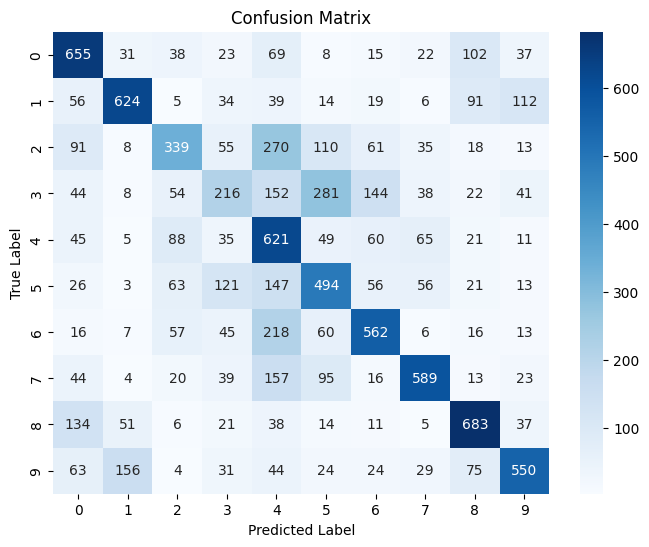

In [ ]:
wide_train_losses, wide_val_losses, wide_train_accuracies, wide_val_accuracies = train_model(wide_model, train_loader, test_loader, epochs=20,pth_path="wide_MLP_CIFAR.pth",optimizer=wide_optimizer)
plot_results(wide_train_losses, wide_train_accuracies, wide_val_losses, wide_val_accuracies)
classification_metrics(wide_model, test_loader,device)

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/Intro_to_DL/baseline_mlp_cifar10")
torch.save(deep_model.state_dict(), "/content/drive/MyDrive/Intro_to_DL/deep_mlp_cifar10")
torch.save(wide_model.state_dict(), "/content/drive/MyDrive/Intro_to_DL/wide_mlp_cifar10")